## This is a preliminary example how to work with daemonflux

1. Install daemonflux:
    - Clone the git repository `git clone https://github.com/mceq-project/daemonflux`
    - `cd ..`
    - `pip install -e .` (in editable mode, so the package gets updated after each `git pull`)
2. Get some splines (now from Slack)
3. Follow this script, and send feedback about the interface on github or Slack

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from daemonflux import Flux

In [24]:
# Point to the files
fl_ic = Flux('../daemonsplines_IceCube_20230207.pkl', cal_file='../prd22_daemon_v3.pkl', use_calibration=True)
fl_ic_nc = Flux('../daemonsplines_IceCube_20230207.pkl', cal_file='../prd22_daemon_v3.pkl', use_calibration=False)

daemonflux calibration not used.


In [6]:
egrid = np.logspace(0,8)
print(fl_ic.zenith_angles)

['0.0000', '101.5370', '104.4775', '107.4576', '110.4873', '113.5782', '116.7437', '120.0000', '123.3670', '126.8699', '130.5416', '134.4270', '138.5904', '143.1301', '148.2117', '154.1581', '161.8051', '18.1949', '180.0000', '25.8419', '31.7883', '36.8699', '41.4096', '45.5730', '49.4584', '53.1301', '56.6330', '60.0000', '63.2563', '66.4218', '69.5127', '72.5424', '75.5225', '78.4630', '81.3731', '84.2608', '87.1340', '90.0000', '92.8660', '95.7392', '98.6269']


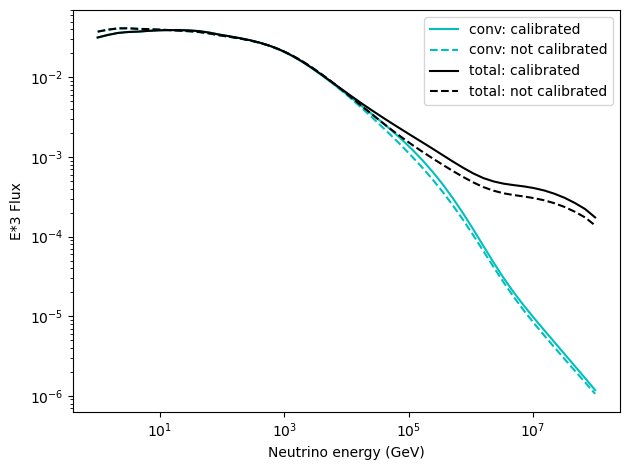

In [14]:
plt.figure()
plt.loglog(egrid, fl_ic.flux(egrid, '180.0000', 'numuflux'), color='c', label='conv: calibrated')
plt.loglog(egrid, fl_ic_nc.flux(egrid, '180.0000', 'numuflux'), color='c', ls ='--', label='conv: not calibrated')
plt.loglog(egrid, fl_ic.flux(egrid, '180.0000', 'total_numuflux'), color='k', label='total: calibrated')
plt.loglog(egrid, fl_ic_nc.flux(egrid, '180.0000', 'total_numuflux'), color='k', ls ='--', label='total: not calibrated')
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('E*3 Flux')
plt.legend()
plt.tight_layout()


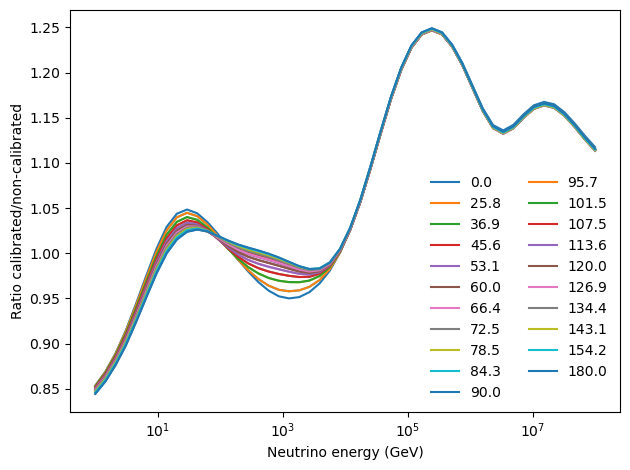

In [25]:
plt.figure()
# Compare calibrated vs non-calibrated for each zenith angle
for zen in sorted([float(z) for z in fl_ic.zenith_angles])[::2]:
    plt.semilogx(egrid, fl_ic.flux(egrid, zen, 'numuflux')/fl_ic_nc.flux(egrid, zen, 'numuflux'), label=f"{zen:3.1f}")
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Ratio calibrated/non-calibrated')
plt.legend(frameon=False, ncol=2)
plt.tight_layout()


In [32]:
# These are the knobs
fl_ic.params.known_parameters

['K+_158G',
 'K+_2P',
 'K+_31G',
 'K-_158G',
 'K-_2P',
 'K-_31G',
 'n_158G',
 'n_2P',
 'p_158G',
 'p_2P',
 'pi+_158G',
 'pi+_20T',
 'pi+_2P',
 'pi+_31G',
 'pi-_158G',
 'pi-_20T',
 'pi-_2P',
 'pi-_31G',
 'GSF_1',
 'GSF_2',
 'GSF_3',
 'GSF_4',
 'GSF_5',
 'GSF_6']

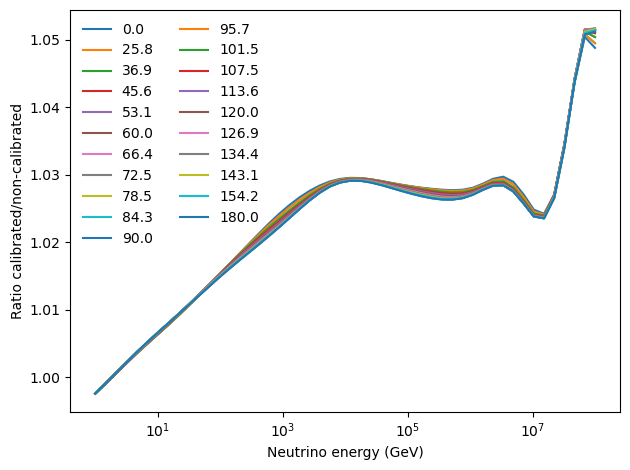

In [31]:
# How to modify tuning parameters
plt.figure()
for zen in sorted([float(z) for z in fl_ic.zenith_angles])[::2]:
    plt.semilogx(egrid, fl_ic.flux(egrid, zen, 'total_numuflux', params={'GSF_3': -2})/fl_ic.flux(egrid, zen, 'total_numuflux'), label=f"{zen:3.1f}")
plt.xlabel('Neutrino energy (GeV)')
plt.ylabel('Ratio calibrated/non-calibrated')
plt.legend(frameon=False, ncol=2)
plt.tight_layout()